In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

Data Generation
===

In [2]:
from numpy.random import rand, randn

In [3]:
n, d, k = 100, 2, 2

In [4]:
np.random.seed(20)
X = rand(n, d)

# means = [rand(d)  for _ in range(k)]  # works for any k
means = [rand(d) * 0.5 + 0.5 , - rand(d)  * 0.5 + 0.5]  # for better plotting when k = 2

S = np.diag(rand(d))

sigmas = [S]*k # we'll use the same Sigma for all clusters for better visual results

print('Means: ',means)
print('Sigmas: ',sigmas)

Means:  [array([0.69872366, 0.75176984]), array([0.25997411, 0.14504062])]
Sigmas:  [array([[0.01764816, 0.        ],
       [0.        , 0.06360523]]), array([[0.01764816, 0.        ],
       [0.        , 0.06360523]])]


Solution
===

In [15]:
def compute_log_p_vector(X,mean,sigma):
    mean = mean.reshape(1,2)
    
    base = 1 / (np.power(2 * np.pi,mean.shape[1]/2) * np.sqrt(np.linalg.det(sigma)))
    base_matrix = np.tile(base,(100,1))
    
    mean_matrix = np.tile(mean,(100,1))
    exponent_matrix = np.diagonal([-.5 * (X-mean_matrix) @ np.linalg.inv(sigma) @ (X - mean_matrix).T])

    return np.power(base_matrix,exponent_matrix)

In [24]:
def compute_log_p_vector_py(X,mean,sigma):
    base = 1 / (((2*np.pi)**mean.shape[0]/2) * np.sqrt(np.linalg.det(sigma)))
    exponent = np.exp(-.5 * np.diagonal([(X-mean) @ np.linalg.inv(sigma) @ (X - mean).T]))
    
    return base*exponent

In [25]:
def compute_log_p(X, mean, sigma):
    ''' fill your code in here...
    '''
    mean = mean.reshape(1,2)
    #mean = np.tile(mean,(100,1))
    #sigma = np.tile(sigma,(25,25))
    
    lst = []
    for x in X:
        x = x.reshape((1,2))
        a = 1 / (np.power(2 * np.pi,mean.shape[1]/2) * np.sqrt(np.linalg.det(sigma)))
        b = -.5 * (x-mean) @ np.linalg.inv(sigma) @ (x - mean).T
        lst.append(a**b[0][0])
    return lst

In [26]:
%%time

log_ps = [compute_log_p_vector_py(X, m, s) for m, s in zip(means, sigmas)]

CPU times: user 580 µs, sys: 215 µs, total: 795 µs
Wall time: 466 µs


In [27]:
log_ps

[array([[0.90441356],
        [2.57049517],
        [0.20300945],
        [0.72492591],
        [2.52392455],
        [0.41291393],
        [1.75854126],
        [4.36518463],
        [0.24423844],
        [0.63373712],
        [1.98218198],
        [1.89929181],
        [2.54769535],
        [1.10675681],
        [0.96075633],
        [1.59812074],
        [0.86212255],
        [2.59089416],
        [0.62645772],
        [0.64175738],
        [1.50867555],
        [0.69203401],
        [0.46162308],
        [0.33517008],
        [4.45834774],
        [2.50581192],
        [1.82968923],
        [2.38723905],
        [1.53252072],
        [0.84460093],
        [1.84910949],
        [1.81048424],
        [2.70930759],
        [0.94348881],
        [2.08770107],
        [0.98115747],
        [2.38976432],
        [0.5274146 ],
        [0.98270519],
        [0.46302761],
        [0.2100607 ],
        [0.84733867],
        [0.93979597],
        [5.08669675],
        [0.49144965],
        [1

In [20]:
%%time

log_ps_ = [compute_log_p(X, m, s) for m, s in zip(means, sigmas)]

CPU times: user 15.3 ms, sys: 1.8 ms, total: 17.1 ms
Wall time: 8.98 ms


In [21]:
log_ps_

[[0.4489474965568463,
  0.18425932193932107,
  3.6087521003562173e-09,
  0.005581516278987156,
  0.02052277251250698,
  0.00032219425835575637,
  0.6488446627898301,
  0.001470138490873271,
  3.199592645374258e-07,
  4.344692415522309e-06,
  0.20291808342449283,
  0.007823520428980575,
  0.34993132907643876,
  0.744353100826695,
  0.037507397719842905,
  0.8681602768184411,
  9.205642873881833e-07,
  0.32250706626558373,
  0.001182508154843453,
  2.161110869835122e-05,
  0.5012944659707584,
  0.00035616827911731874,
  0.00013262869916674883,
  2.206380508399305e-06,
  0.006376311791640661,
  0.22356916179420228,
  0.7293045522263345,
  0.5228942318462223,
  0.8291885367435696,
  0.01854933117370386,
  0.0003429416223319969,
  0.8063869599949218,
  0.26630875620735234,
  0.0008412400375227672,
  0.0017585712850685172,
  0.5188593166400819,
  0.15991242874495418,
  0.003847150416703458,
  0.2462452446801403,
  0.00021753033272788643,
  7.389107517984077e-09,
  1.2976915674010395e-05,
  3

In [12]:
assignments = np.argmax(log_ps, axis=0)
print(assignments)

[[0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]]


In [13]:
assignments.mean()

0.1

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not [['red']
 ['red']
 ['green']
 ['red']
 ['red']
 ['red']
 ['red']
 ['red']
 ['red']
 ['green']
 ['red']
 ['red']
 ['red']
 ['red']
 ['red']
 ['red']
 ['green']
 ['red']
 ['red']
 ['red']
 ['red']
 ['red']
 ['red']
 ['red']
 ['red']
 ['red']
 ['red']
 ['red']
 ['red']
 ['red']
 ['red']
 ['red']
 ['red']
 ['red']
 ['red']
 ['red']
 ['red']
 ['red']
 ['red']
 ['red']
 ['green']
 ['green']
 ['red']
 ['red']
 ['green']
 ['red']
 ['green']
 ['red']
 ['red']
 ['red']
 ['red']
 ['red']
 ['red']
 ['red']
 ['red']
 ['red']
 ['red']
 ['red']
 ['red']
 ['green']
 ['red']
 ['red']
 ['red']
 ['red']
 ['red']
 ['red']
 ['red']
 ['red']
 ['red']
 ['red']
 ['red']
 ['red']
 ['red']
 ['red']
 ['red']
 ['red']
 ['red']
 ['red']
 ['red']
 ['green']
 ['red']
 ['red']
 ['red']
 ['red']
 ['red']
 ['red']
 ['red']
 ['red']
 ['red']
 ['red']
 ['red']
 ['red']
 ['red']
 ['red']
 ['red']
 ['red']
 ['red']
 ['green']
 ['red']
 ['red']]

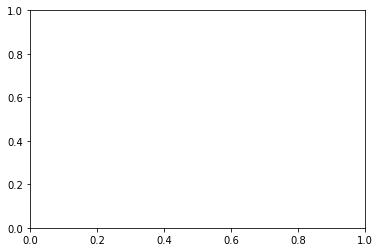

In [28]:
colors = np.array(['red', 'green'])[assignments]
plt.scatter(X[:, 0], X[:, 1], c=colors, s=100)
plt.scatter(np.array(means)[:, 0], np.array(means)[:, 1], marker='*', s=200)
plt.show()